# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [160]:
import os
from pprint import pprint

import numpy as np
import pandas as pd

# .ensemble 메서드는 앙상블 학습 위주
from sklearn.ensemble import RandomForestClassifier 
# .metrics 메서드는 모델의 성능을 평가하는 지표를 제공
from sklearn.metrics import( 
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split # .model_seclection 메서드는 모델의 성능 평가와 하이퍼파라미터튜닝
from tqdm import tqdm # 진행바 표시 라이브러리

import matplotlib.pyplot as plt

### 데이터 읽어오기


In [161]:
ROOT_DIR = "data" # 데이터가 저장된 디렉토리의 경로를 나타냄
RANDOM_STATE = 110 # 난수 생성기의 초기값을 설정

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Z Unit Time_Dam,CURE END POSITION Z Judge Value_Dam,CURE END POSITION Θ Collect Result_Dam,CURE END POSITION Θ Unit Time_Dam,CURE END POSITION Θ Judge Value_Dam,CURE SPEED Collect Result_Dam,CURE SPEED Unit Time_Dam,CURE SPEED Judge Value_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION X Unit Time_Dam,CURE STANDBY POSITION X Judge Value_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Z Unit Time_Dam,CURE STANDBY POSITION Z Judge Value_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE STANDBY POSITION Θ Unit Time_Dam,CURE STANDBY POSITION Θ Judge Value_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION X Unit Time_Dam,CURE START POSITION X Judge Value_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Z Unit Time_Dam,CURE START POSITION Z Judge Value_Dam,CURE START POSITION Θ Collect Result_Dam,CURE START POSITION Θ Unit Time_Dam,CURE START POSITION Θ Judge Value_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED SPEED OF RESIN Unit Time_Dam,DISCHARGED SPEED OF RESIN Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage1) Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage2) Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage3) Judge Value_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage1) Unit Time_Dam,Dispense Volume(Stage1) Judge Value_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage2) Unit Time_Dam,Dispense Volume(Stage2) Judge Value_Dam,Dispense Volume(Stage3) Collect Result_Dam,Dispense Volume(Stage3) Unit Time_Dam,Dispense Volume(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position X Unit Time_Dam,HEAD Standby Position X Judge Value_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Y Unit Time_Dam,HEAD Standby Position Y Judge Value_Dam,HEAD Standby Position Z Collect Result_Dam,HEAD Standby Position Z Unit Time_Dam,HEAD Standby Position Z Judge Value_Dam,Head

In [3]:
train_data.info()
list(train_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


['Wip Line_Dam',
 'Process Desc._Dam',
 'Equipment_Dam',
 'Model.Suffix_Dam',
 'Workorder_Dam',
 'Insp. Seq No._Dam',
 'Insp Judge Code_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION X Unit Time_Dam',
 'CURE END POSITION X Judge Value_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Z Unit Time_Dam',
 'CURE END POSITION Z Judge Value_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE END POSITION Θ Unit Time_Dam',
 'CURE END POSITION Θ Judge Value_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE SPEED Unit Time_Dam',
 'CURE SPEED Judge Value_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION X Unit Time_Dam',
 'CURE STANDBY POSITION X Judge Value_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Z Unit Time_Dam',
 'CURE STANDBY POSITION Z Judge Value_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE STANDBY POSITION Θ Unit Time_Dam',
 'CURE STANDBY POSITION Θ Judge Value_Dam',
 '

### 모든 값이 결측치인 열 제거

In [162]:
# 결측치가 있는 열들만 추출하고 결측치 개수 계산
missing_data = train_data.isnull().sum() # ,isnull()는 value가 결측값이면 True 아니면 False 반환
missing_columns = missing_data[missing_data > 0]

# 결과 출력
print("결측치가 있는 컬럼들:")
print(missing_columns)

결측치가 있는 컬럼들:
CURE END POSITION X Unit Time_Dam      40506
CURE END POSITION X Judge Value_Dam    40506
CURE END POSITION Z Unit Time_Dam      40506
CURE END POSITION Z Judge Value_Dam    40506
CURE END POSITION Θ Unit Time_Dam      40506
                                       ...  
Production Qty Judge Value_Fill2       40506
Receip No Unit Time_Fill2              40506
Receip No Judge Value_Fill2            40506
WorkMode Unit Time_Fill2               40506
WorkMode Judge Value_Fill2             40506
Length: 286, dtype: int64


In [163]:
# 결측치가 40506개인 열들을 찾고 제거
cols_to_drop = train_data.columns[train_data.isnull().sum() == 40506]
train_data_cleaned = train_data.drop(columns=cols_to_drop)

# 결과 출력
print(f"제거된 컬럼들: {cols_to_drop.tolist()}")
print(f"남은 컬럼들: {train_data_cleaned}")

# 모든 값이 null인 열을 제외하면 186개의 컬럼

제거된 컬럼들: ['CURE END POSITION X Unit Time_Dam', 'CURE END POSITION X Judge Value_Dam', 'CURE END POSITION Z Unit Time_Dam', 'CURE END POSITION Z Judge Value_Dam', 'CURE END POSITION Θ Unit Time_Dam', 'CURE END POSITION Θ Judge Value_Dam', 'CURE SPEED Unit Time_Dam', 'CURE SPEED Judge Value_Dam', 'CURE STANDBY POSITION X Unit Time_Dam', 'CURE STANDBY POSITION X Judge Value_Dam', 'CURE STANDBY POSITION Z Unit Time_Dam', 'CURE STANDBY POSITION Z Judge Value_Dam', 'CURE STANDBY POSITION Θ Unit Time_Dam', 'CURE STANDBY POSITION Θ Judge Value_Dam', 'CURE START POSITION X Unit Time_Dam', 'CURE START POSITION X Judge Value_Dam', 'CURE START POSITION Z Unit Time_Dam', 'CURE START POSITION Z Judge Value_Dam', 'CURE START POSITION Θ Unit Time_Dam', 'CURE START POSITION Θ Judge Value_Dam', 'DISCHARGED SPEED OF RESIN Unit Time_Dam', 'DISCHARGED SPEED OF RESIN Judge Value_Dam', 'DISCHARGED TIME OF RESIN(Stage1) Unit Time_Dam', 'DISCHARGED TIME OF RESIN(Stage1) Judge Value_Dam', 'DISCHARGED TIME OF RE

### type 확인

In [164]:
# 데이터 형식이 object인 컬럼들만 추출
object_columns = train_data_cleaned.select_dtypes(include=['object'])

# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)

# 결과 출력
print("데이터 형식이 object인 컬럼들:")
object_columns

# NaN값, 숫자, ok 라는 값의 열의 존재 확인

데이터 형식이 object인 컬럼들:


,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp Judge Code_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,Wip Line_AutoClave,Process Desc._AutoClave,Equipment_AutoClave,Model.Suffix_AutoClave,Workorder_AutoClave,Insp Judge Code_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,Wip Line_Fill1,Process Desc._Fill1,Equipment_Fill1,Model.Suffix_Fill1,Workorder_Fill1,Insp Judge Code_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1,Wip Line_Fill2,Process Desc._Fill2,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,Insp Judge Code_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,OK,NaN,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334505,4F1XA938-1,OK,OK,OK,OK,OK,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334505,4F1XA938-1,OK,NaN,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334505,4F1XA938-1,OK,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,OK,550.3,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334505,3KPM0016-2,OK,OK,OK,OK,OK,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334505,3KPM0016-2,OK,838.4,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334505,3KPM0016-2,OK,835.5,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,OK,OK,OK,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,4E1X9167-1,OK,OK,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334501,4E1X9167-1,OK,OK,OK,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #2,AJX75334501,4E1X9167-1,OK,OK,OK,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,OK,162.4,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3K1X0057-1,OK,OK,OK,OK,OK,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334501,3K1X0057-1,OK,837.7,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #2,AJX75334501,3K1X0057-1,OK,305,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,OK,549,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3HPM0007-1,OK,OK,OK,OK,NG,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3HPM0007-1,OK,838.4,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3HPM0007-1,OK,835.5,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,OK,550.3,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3J1XF434-2,OK,OK,OK,OK,OK,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3J1XF434-2,OK,838.4,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3J1XF434-2,OK,835.5,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,OK,NaN,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,4E1XC796-1,OK,OK,OK,OK,NG,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334501,4E1XC796-1,OK,NaN,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #2,AJX75334501,4E1XC796-1,OK,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,OK,OK,OK,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,4C1XD438-1,OK,OK,OK,OK,NG,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,4C1XD438-1,OK,OK,OK,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,4C1XD438-1,OK,OK,OK,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,OK,162.4,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3I1XA258-1,OK,OK,OK,OK,OK,NaN,NaN,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334501,3I1XA258-1,OK,8

### HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam, Fill1, Fill2 컬럼 삭제

In [165]:
# 특정 열들의 이상치 처리
columns_to_replace = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 'OK' 값을 np.nan (null 값)으로 대체
train_data_cleaned[columns_to_replace] = train_data_cleaned[columns_to_replace].replace('OK', np.nan)

# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)

# 결과 확인
train_data_cleaned

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Wip Line_AutoClave,Process Desc._AutoClave,Equipment_AutoClave,Model.Suffix_AutoClave,Workorder_AutoClave,Insp. Seq No._AutoClave,Insp Judge Code_AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_Auto

In [166]:
# 결측치 비율 계산 및 출력
for column in columns_to_replace:
    num_missing = train_data_cleaned[column].isnull().sum()
    
    # 전체 데이터 개수
    total = len(train_data_cleaned[column])
    
    # 결측치 비율
    missing_percentage = (num_missing / total) * 100
    
    # 결과 출력
    print(f"{column}의 결측치 비율: {missing_percentage:.2f}%")

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam의 결측치 비율: 59.40%
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1의 결측치 비율: 59.40%
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2의 결측치 비율: 59.40%


In [167]:
# 결측치 비율이 50% 이상이므로 제거
columns_to_remove = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
]

# 컬럼 제거
train_data_cleaned = train_data_cleaned.drop(columns=columns_to_remove)

### 액셀 data와 다른 컬럼 제거

In [168]:
# 잘못 유입된 컬럼 제거
train_data_cleaned = train_data_cleaned.drop(columns ='GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave')
train_data_cleaned

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Wip Line_AutoClave,Process Desc._AutoClave,Equipment_AutoClave,Model.Suffix_AutoClave,Workorder_AutoClave,Insp. Seq No._AutoClave,Insp Judge Code_AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,Wip Line_Fill1,Process Desc._Fill1,Equipment_Fill1,Model.Suffix_Fill1,Workorder_Fill1,Insp. Seq No._Fill

### Value가 OK, NaN뿐인 컬럼 원핫인코딩

In [169]:
columns_to_transform = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
                        'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
                        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
                        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2']

# 변환: null 값이 있는 열은 0, 'OK' 값이 있는 열은 1로
train_data_cleaned[columns_to_transform] = train_data_cleaned[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)

# 결과 확인 (선택 사항)
train_data_cleaned

/tmp/ipykernel_55/1789016987.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data_cleaned[columns_to_transform] = train_data_cleaned[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)


,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Wip Line_AutoClave,Process Desc._AutoClave,Equipment_AutoClave,Model.Suffix_AutoClave,Workorder_AutoClave,Insp. Seq No._AutoClave,Insp Judge Code_AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,Wip Line_Fill1,Process Desc._Fill1,Equipment_Fill1,Model.Suffix_Fill1,Workorder_Fill1,Insp. Seq No._Fill

### Object type 중 고유값이 1인 컬럼 제거

In [170]:
# 데이터 형식이 object인 컬럼들만 추출
object_columns = train_data_cleaned.select_dtypes(include=['object'])

# 결과 출력
print("데이터 형식이 object인 컬럼들:")
print(object_columns.columns)

데이터 형식이 object인 컬럼들:
Index(['Wip Line_Dam', 'Process Desc._Dam', 'Equipment_Dam',
       'Model.Suffix_Dam', 'Workorder_Dam', 'Insp Judge Code_Dam',
       'Wip Line_AutoClave', 'Process Desc._AutoClave', 'Equipment_AutoClave',
       'Model.Suffix_AutoClave', 'Workorder_AutoClave',
       'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave',
       '2nd Pressure Judge Value_AutoClave',
       '3rd Pressure Judge Value_AutoClave',
       'Chamber Temp. Judge Value_AutoClave', 'Wip Line_Fill1',
       'Process Desc._Fill1', 'Equipment_Fill1', 'Model.Suffix_Fill1',
       'Workorder_Fill1', 'Insp Judge Code_Fill1', 'Wip Line_Fill2',
       'Process Desc._Fill2', 'Equipment_Fill2', 'Model.Suffix_Fill2',
       'Workorder_Fill2', 'Insp Judge Code_Fill2', 'target'],
      dtype='object')


In [171]:
# 각 컬럼의 범주형 변수 값들을 확인하는 코드
for column in object_columns.columns:
    print(object_columns[column].value_counts()) #.value_counts()는 시리즈의 메서드로 열 내에 존재하는 고윳값의 개수를 세어줌
    print("\n" + "="*50 + "\n")

Wip Line_Dam
IVI-OB6    40506
Name: count, dtype: int64


Process Desc._Dam
Dam Dispenser    40506
Name: count, dtype: int64


Equipment_Dam
Dam dispenser #1    25030
Dam dispenser #2    15476
Name: count, dtype: int64


Model.Suffix_Dam
AJX75334501    33820
AJX75334502     3390
AJX75334505     2635
AJX75334507      310
AJX75334503      162
AJX75334506      129
AJX75334508       60
Name: count, dtype: int64


Workorder_Dam
3L1X8574-2       272
3K1XC268-1       227
3L1X9934-1       217
3L1X8506-1       217
3K1XA586-2       189
                ... 
4BPM0084-1         2
3FPXX064-0003      2
3H1XB714-1         1
4CPM0166-1         1
3HPM0061-1         1
Name: count, Length: 663, dtype: int64


Insp Judge Code_Dam
OK    40506
Name: count, dtype: int64


Wip Line_AutoClave
IVI-OB6    40506
Name: count, dtype: int64


Process Desc._AutoClave
Auto Clave Out    40506
Name: count, dtype: int64


Equipment_AutoClave
Auto Clave Out    40506
Name: count, dtype: int64


Model.Suffix_AutoClave
AJX753

In [172]:
# 단일 값인 열들을 제거할 리스트 (.value_count()를 통해 파악한 것)
cols_to_drop = ['Wip Line_Dam', 'Process Desc._Dam', 'Insp Judge Code_Dam',
                'Wip Line_AutoClave', 'Process Desc._AutoClave',
                'Equipment_AutoClave', 'Insp Judge Code_AutoClave',
                '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave',
                '3rd Pressure Judge Value_AutoClave', 'Wip Line_Fill1',
                'Process Desc._Fill1', 'Insp Judge Code_Fill1',
                'Wip Line_Fill2', 'Process Desc._Fill2', 'Insp Judge Code_Fill2']

# 열 제거
train_data_cleaned = train_data_cleaned.drop(columns=cols_to_drop)

# 결과 출력
print(train_data_cleaned)

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #1      AJX75334505    4F1XA938-1                  1   
1      Dam dispenser #1      AJX75334505    3KPM0016-2                  1   
2      Dam dispenser #2      AJX75334501    4E1X9167-1                  1   
3      Dam dispenser #2      AJX75334501    3K1X0057-1                  1   
4      Dam dispenser #1      AJX75334501    3HPM0007-1                  1   
...                 ...              ...           ...                ...   
40501  Dam dispenser #1      AJX75334501    3J1XF434-2                  1   
40502  Dam dispenser #2      AJX75334501    4E1XC796-1                  1   
40503  Dam dispenser #1      AJX75334501    4C1XD438-1                  1   
40504  Dam dispenser #2      AJX75334501    3I1XA258-1                  1   
40505  Dam dispenser #1      AJX75334501    3G1XA501-1                  1   

       CURE END POSITION X Collect Result_Dam  \
0                         

### 값이 중복된 컬럼 1개 제외하고 삭제

In [173]:
# 범주형 변수 중 같은 값으로 묶을 수 있는 컬럼들
columns_to_check = ['Model.Suffix_Dam', 'Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2']

# 각 행에서 선택된 열들이 동일한 값인지 확인_같으면 지우려고
# 모든 열의 값이 동일하면 True, 그렇지 않으면 False
train_data_cleaned['is_same'] = train_data_cleaned[columns_to_check].nunique(axis=1) == 1 # axis=1 : 행별로 고유값을 계산하겠다. == 1 : 그 값이 하나라면 is_same 열에 저장

# 동일한 값을 가지는 행의 수와 비율을 확인
total_count = train_data_cleaned.shape[0]
same_count = train_data_cleaned['is_same'].sum()

print(f"총 {total_count}개의 행 중 {same_count}개의 행에서 모든 컬럼 값이 동일합니다.")

# 동일한 값인 행들만 출력
same_rows = train_data_cleaned[train_data_cleaned['is_same'] == True]
print(same_rows[columns_to_check])

총 40506개의 행 중 40506개의 행에서 모든 컬럼 값이 동일합니다.
      Model.Suffix_Dam Model.Suffix_AutoClave Model.Suffix_Fill1  \
0          AJX75334505            AJX75334505        AJX75334505   
1          AJX75334505            AJX75334505        AJX75334505   
2          AJX75334501            AJX75334501        AJX75334501   
3          AJX75334501            AJX75334501        AJX75334501   
4          AJX75334501            AJX75334501        AJX75334501   
...                ...                    ...                ...   
40501      AJX75334501            AJX75334501        AJX75334501   
40502      AJX75334501            AJX75334501        AJX75334501   
40503      AJX75334501            AJX75334501        AJX75334501   
40504      AJX75334501            AJX75334501        AJX75334501   
40505      AJX75334501            AJX75334501        AJX75334501   

      Model.Suffix_Fill2  
0            AJX75334505  
1            AJX75334505  
2            AJX75334501  
3            AJX75334501  
4     

In [174]:
# 범주형 변수 중 같은 값으로 묶을 수 있는 컬럼들
columns_to_check = ['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']

# 각 행에서 선택된 열들이 동일한 값인지 확인
# 모든 열의 값이 동일하면 True, 그렇지 않으면 False
train_data_cleaned['is_same'] = train_data_cleaned[columns_to_check].nunique(axis=1) == 1

# 동일한 값을 가지는 행의 수와 비율을 확인
same_count = train_data_cleaned['is_same'].sum()
total_count = train_data_cleaned.shape[0]

print(f"총 {total_count}개의 행 중 {same_count}개의 행에서 모든 컬럼 값이 동일합니다.")

# 동일한 값인 행들만 출력 (선택사항)
same_rows = train_data_cleaned[train_data_cleaned['is_same'] == True]
print(same_rows[columns_to_check])

총 40506개의 행 중 40506개의 행에서 모든 컬럼 값이 동일합니다.
      Workorder_Dam Workorder_AutoClave Workorder_Fill1 Workorder_Fill2
0        4F1XA938-1          4F1XA938-1      4F1XA938-1      4F1XA938-1
1        3KPM0016-2          3KPM0016-2      3KPM0016-2      3KPM0016-2
2        4E1X9167-1          4E1X9167-1      4E1X9167-1      4E1X9167-1
3        3K1X0057-1          3K1X0057-1      3K1X0057-1      3K1X0057-1
4        3HPM0007-1          3HPM0007-1      3HPM0007-1      3HPM0007-1
...             ...                 ...             ...             ...
40501    3J1XF434-2          3J1XF434-2      3J1XF434-2      3J1XF434-2
40502    4E1XC796-1          4E1XC796-1      4E1XC796-1      4E1XC796-1
40503    4C1XD438-1          4C1XD438-1      4C1XD438-1      4C1XD438-1
40504    3I1XA258-1          3I1XA258-1      3I1XA258-1      3I1XA258-1
40505    3G1XA501-1          3G1XA501-1      3G1XA501-1      3G1XA501-1

[40506 rows x 4 columns]


In [175]:
# 하나의 컬럼씩만 남기고 다 삭제_Model.Suffix_Dam 및 Workorder_Dam 컬럼이 대표함
cols_to_drop = ['Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2',
               'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']

# 열 제거
train_data_cleaned = train_data_cleaned.drop(columns=cols_to_drop)
train_data_cleaned

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Insp. Seq No._AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,Equipment_Fill1,Insp. Seq No._Fill1,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL 

### 추가) 값이 중복된 컬럼 1개 제외하고 삭제

In [176]:
# 중복값 제거 - ['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2'] 컬럼 1개만 남기기
# Equipment_Dam이 대표 컬럼

train_data_cleaned = train_data_cleaned.drop(columns=['Equipment_Fill1', 'Equipment_Fill2'])

def convert_value(x):
    if '#1' in x:
        return '1'
    elif '#2' in x:
        return '2'
    return x

train_data_cleaned['Equipment_Dam'] = train_data_cleaned['Equipment_Dam'].apply(convert_value)
train_data_cleaned['Equipment_Dam'] = train_data_cleaned['Equipment_Dam'].astype('int')

train_data_cleaned

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Insp. Seq No._AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,Insp. Seq No._Fill1,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXI

### 고유값이 1개인 컬럼 제거

In [177]:
## 단 하나의 값으로 이루어진 컬럼 찾아 제거하자

single_value_columns = train_data_cleaned.nunique()[train_data_cleaned.nunique() == 1].index

# 결과 출력
print("단 하나의 값으로 이루어진 컬럼들:")
print(single_value_columns)
list_count = len(single_value_columns)
print(list_count)

# 위 결과에 해당하는컬럼 제거를 위해 리스트 생성
columns_to_remove = [
    'Insp. Seq No._Dam', 
    'CURE STANDBY POSITION X Collect Result_Dam',
    'CURE STANDBY POSITION Z Collect Result_Dam',
    'CURE STANDBY POSITION Θ Collect Result_Dam',
    'CURE START POSITION Z Collect Result_Dam',
    'Insp. Seq No._AutoClave',
    'Insp. Seq No._Fill1', 
    'Insp. Seq No._Fill2',
    'CURE END POSITION Θ Collect Result_Fill2',
    'CURE STANDBY POSITION X Collect Result_Fill2',
    'CURE STANDBY POSITION Θ Collect Result_Fill2',
    'CURE START POSITION Θ Collect Result_Fill2',
    'DISCHARGED SPEED OF RESIN Collect Result_Fill2',
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2',
    'Dispense Volume(Stage1) Collect Result_Fill2',
    'Dispense Volume(Stage2) Collect Result_Fill2',
    'Dispense Volume(Stage3) Collect Result_Fill2',
    'is_same'
]

# 컬럼 제거
train_data_cleaned = train_data_cleaned.drop(columns=columns_to_remove)

# 결과 확인
print(f"제거 후 남은 컬럼 수: {train_data_cleaned.shape[1]}") # .shape[1]은 해당 df 열의 수를 반환해줌

단 하나의 값으로 이루어진 컬럼들:
Index(['Insp. Seq No._Dam', 'CURE STANDBY POSITION X Collect Result_Dam',
       'CURE STANDBY POSITION Z Collect Result_Dam',
       'CURE STANDBY POSITION Θ Collect Result_Dam',
       'CURE START POSITION Z Collect Result_Dam', 'Insp. Seq No._AutoClave',
       'Insp. Seq No._Fill1', 'Insp. Seq No._Fill2',
       'CURE END POSITION Θ Collect Result_Fill2',
       'CURE STANDBY POSITION X Collect Result_Fill2',
       'CURE STANDBY POSITION Θ Collect Result_Fill2',
       'CURE START POSITION Θ Collect Result_Fill2',
       'DISCHARGED SPEED OF RESIN Collect Result_Fill2',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2',
       'Dispense Volume(Stage1) Collect Result_Fill2',
       'Dispense Volume(Stage2) Collect Result_Fill2',
       'Dispense Volume(Stage3) Collect Result_Fill2', 'is_same'],
      dtype='object')
20
제거 후

### 추가)  Chamber Temp. Judge Value_AutoClave 원핫인코딩

In [178]:
columns_to_transform = ['Chamber Temp. Judge Value_AutoClave']
 
# 변환: NG 값은 0, 'OK' 값은 1로
train_data_cleaned[columns_to_transform] = train_data_cleaned[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)

# 결과 확인 (선택 사항)
train_data_cleaned['Chamber Temp. Judge Value_AutoClave']

/tmp/ipykernel_55/1545990846.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data_cleaned[columns_to_transform] = train_data_cleaned[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)


0        1
1        1
2        1
3        1
4        0
        ..
40501    1
40502    0
40503    0
40504    1
40505    0
Name: Chamber Temp. Judge Value_AutoClave, Length: 40506, dtype: int64

### 추가) Model.Suffix_Dam, Workorder_Dam 레이블 인코딩

In [179]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 컬럼들의 이름 리스트
columns_to_encode = ['Model.Suffix_Dam', 'Workorder_Dam']  # 예시 컬럼들

# 각 컬럼에 대해 레이블 인코딩 수행
label_encoder = LabelEncoder()
for col in columns_to_encode:
    train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])

# 결과 출력
print(train_data_cleaned[columns_to_encode].head())

   Model.Suffix_Dam  Workorder_Dam
0                 3            657
1                 3            283
2                 0            589
3                 0            251
4                 0            142


### PCA

In [180]:
# object 타입인 컬럼들만 선택(.select_dtypes 메서드)
object_columns = train_data_cleaned.select_dtypes(include=['object']).columns

# 결과 출력
print("Object 타입인 컬럼들:")
print(object_columns)

object_columns = train_data_cleaned.select_dtypes(include=['object']).columns
print(f"Object 타입인 컬럼의 수: {len(object_columns)}")

# PCA를 위해 object_columns을 제외한 df 생성을 위해 리스트 생성(아직 df는 아닌 상태임)
object_columns = ['target']

# object_columns 제거(이 코드에서 위 리스트를 제외한 df를 생성한 것)
train_data_cleaned_except_object = train_data_cleaned.drop(columns=object_columns)

# 새로운 df 확인
print(train_data_cleaned_except_object.head())

Object 타입인 컬럼들:
Index(['target'], dtype='object')
Object 타입인 컬럼의 수: 1
   Equipment_Dam  Model.Suffix_Dam  Workorder_Dam  \
0              1                 3            657   
1              1                 3            283   
2              2                 0            589   
3              2                 0            251   
4              1                 0            142   

   CURE END POSITION X Collect Result_Dam  \
0                                   240.0   
1                                   240.0   
2                                  1000.0   
3                                  1000.0   
4                                   240.0   

   CURE END POSITION Z Collect Result_Dam  \
0                                     2.5   
1                                     2.5   
2                                    12.5   
3                                    12.5   
4                                     2.5   

   CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_

In [181]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성_표준화를 수행하는 클래스 생성
scaler = StandardScaler()

# 수치형 데이터만 표준화 적용. scaler는 객체 .fit_transform은 각 컬럼에 대해 평균과 표준편차계산 후 표준화
train_data_standardized = scaler.fit_transform(train_data_cleaned_except_object)

# 표준화된 데이터를 다시 데이터프레임으로 변환
train_data_standardized = pd.DataFrame(train_data_standardized, columns=train_data_cleaned_except_object.columns)

# 표준화된 df 확인
print(train_data_standardized.head())

   Equipment_Dam  Model.Suffix_Dam  Workorder_Dam  \
0      -0.786319          2.860186       1.908389   
1      -0.786319          2.860186      -0.132974   
2       1.271748         -0.373781       1.537232   
3       1.271748         -0.373781      -0.307636   
4      -0.786319         -0.373781      -0.902578   

   CURE END POSITION X Collect Result_Dam  \
0                               -0.786319   
1                               -0.786319   
2                                1.271748   
3                                1.271748   
4                               -0.786319   

   CURE END POSITION Z Collect Result_Dam  \
0                               -0.786319   
1                               -0.786319   
2                                1.271748   
3                                1.271748   
4                               -0.786319   

   CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                               -0.786319                      

In [182]:
import numpy as np

# 공분산 행렬 계산
cov_matrix = np.cov(train_data_standardized.T) # 공분산을 계산할 때 각 변수는 행으로 배치되어야해서 T(전치)해줌

# 공분산 결과 확인
print("공분산 행렬:")
print(cov_matrix)

공분산 행렬:
[[ 1.00002469  0.07092377  0.29675685 ... -0.16764423  0.19025753
   0.14834661]
 [ 0.07092377  1.00002469  0.37233632 ... -0.14883148  0.02915145
   0.22786224]
 [ 0.29675685  0.37233632  1.00002469 ... -0.59728204  0.52207534
   0.46161766]
 ...
 [-0.16764423 -0.14883148 -0.59728204 ...  1.00002469 -0.50971149
  -0.36992537]
 [ 0.19025753  0.02915145  0.52207534 ... -0.50971149  1.00002469
   0.31211342]
 [ 0.14834661  0.22786224  0.46161766 ... -0.36992537  0.31211342
   1.00002469]]


In [183]:
import numpy as np

# 공분산 행렬로부터 고유값과 고유벡터 계산(np.linalg.eig()는 선형대수 모듈인 linalg에서 제공하는 함수)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 결과 출력
print("고유값:")
print(eigenvalues)
print("\n고유벡터:")
print(eigenvectors)

고유값:
[ 6.71565457e+01+0.00000000e+00j  1.95521046e+01+0.00000000e+00j
  1.38913854e+01+0.00000000e+00j  4.84990642e+00+0.00000000e+00j
  4.14204009e+00+0.00000000e+00j  3.13626776e+00+0.00000000e+00j
  2.23901503e+00+0.00000000e+00j  2.20086972e+00+0.00000000e+00j
  2.04736362e+00+0.00000000e+00j  1.83747810e+00+0.00000000e+00j
  1.77817890e+00+0.00000000e+00j  1.62149276e+00+0.00000000e+00j
  1.59086310e+00+0.00000000e+00j  1.38341403e+00+0.00000000e+00j
  1.13017337e+00+0.00000000e+00j  1.22635913e+00+0.00000000e+00j
  9.50417873e-01+0.00000000e+00j  9.03005437e-01+0.00000000e+00j
  8.12756266e-01+0.00000000e+00j  7.18374332e-01+0.00000000e+00j
  6.79699954e-01+0.00000000e+00j  6.30047491e-01+0.00000000e+00j
  5.74597693e-01+0.00000000e+00j  5.16960986e-01+0.00000000e+00j
  4.17002967e-01+0.00000000e+00j  3.83298502e-01+0.00000000e+00j
  2.67726352e-01+0.00000000e+00j  2.38016403e-01+0.00000000e+00j
  2.33227745e-01+0.00000000e+00j  1.62704647e-01+0.00000000e+00j
  1.43748426e-01+0.0

In [184]:
import numpy as np

# 고유값을 내림차순으로 정렬하고, 그에 따라 고유벡터도 정렬
sorted_indices = np.argsort(eigenvalues)[::-1] # .argsort는 오름차순일때 인덱스를 반환하고 -1을 통해 이를 뒤집어 내림차순해줌
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices] # 고유벡터는 2차원 배열. 고유값과 동일한 순서로 저장하기 위해 [:, sorted_indices]

# 내림차순 결과 출력
print("내림차순 고유값:")
print(sorted_eigenvalues)
print("\n내림차순 고유벡터:")
print(sorted_eigenvectors)

내림차순 고유값:
[ 6.71565457e+01+0.00000000e+00j  1.95521046e+01+0.00000000e+00j
  1.38913854e+01+0.00000000e+00j  4.84990642e+00+0.00000000e+00j
  4.14204009e+00+0.00000000e+00j  3.13626776e+00+0.00000000e+00j
  2.23901503e+00+0.00000000e+00j  2.20086972e+00+0.00000000e+00j
  2.04736362e+00+0.00000000e+00j  1.83747810e+00+0.00000000e+00j
  1.77817890e+00+0.00000000e+00j  1.62149276e+00+0.00000000e+00j
  1.59086310e+00+0.00000000e+00j  1.38341403e+00+0.00000000e+00j
  1.22635913e+00+0.00000000e+00j  1.13017337e+00+0.00000000e+00j
  9.50417873e-01+0.00000000e+00j  9.03005437e-01+0.00000000e+00j
  8.12756266e-01+0.00000000e+00j  7.18374332e-01+0.00000000e+00j
  6.79699954e-01+0.00000000e+00j  6.30047491e-01+0.00000000e+00j
  5.74597693e-01+0.00000000e+00j  5.16960986e-01+0.00000000e+00j
  4.17002967e-01+0.00000000e+00j  3.83298502e-01+0.00000000e+00j
  2.67726352e-01+0.00000000e+00j  2.38016403e-01+0.00000000e+00j
  2.33227745e-01+0.00000000e+00j  1.62704647e-01+0.00000000e+00j
  1.43748426e-0

In [185]:
## 주성분을 선택하기 위해 누적분산 90% 지점 계산

# 전체 고유값의 합 계산
total_variance = np.sum(sorted_eigenvalues)

# 각 주성분이 설명하는 분산 비율 
explained_variance_ratio = sorted_eigenvalues / total_variance

# 누적 분산 비율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) # .cumsum은 누적 합 메서드

# 누적 분산 비율이 70%를 넘는 첫 번째 주성분의 인덱스 찾기
num_components = np.argmax(cumulative_variance_ratio >= 0.70) + 1 # np.argmax가 ()안의 조건을 만족하는 첫번째 인덱스를 반환해줌

# 선택된 주성분에 해당하는 고유벡터
selected_eigenvectors = sorted_eigenvectors[:, :num_components] # [모든행, 첫행부터 num__components까지]

# 선택된 주성분 결과 출력
print(f"선택된 주성분의 수: {num_components}")
print("선택된 주성분:")
print(selected_eigenvectors)

선택된 주성분의 수: 3
선택된 주성분:
[[-0.05178983+0.j -0.15655682+0.j -0.15588065+0.j]
 [-0.02724273+0.j -0.00373866+0.j  0.02109945+0.j]
 [-0.10426151+0.j  0.02295485+0.j -0.00157196+0.j]
 [-0.05178983+0.j -0.15655682+0.j -0.15588065+0.j]
 [-0.05178983+0.j -0.15655682+0.j -0.15588065+0.j]
 [-0.05178983+0.j -0.15655682+0.j -0.15588065+0.j]
 [-0.04188424+0.j  0.02081481+0.j  0.00950857+0.j]
 [ 0.05178983+0.j  0.15655682+0.j  0.15588065+0.j]
 [-0.05178983+0.j -0.15655682+0.j -0.15588065+0.j]
 [-0.0903268 +0.j  0.08600587+0.j -0.077753  +0.j]
 [-0.05673179+0.j -0.13883177+0.j  0.15880177+0.j]
 [-0.10485727+0.j -0.01796344+0.j  0.06337952+0.j]
 [-0.05593842+0.j -0.13936627+0.j  0.15875416+0.j]
 [-0.06964124+0.j -0.09956783+0.j  0.13154922+0.j]
 [-0.0999918 +0.j -0.00206782+0.j  0.0504546 +0.j]
 [-0.06936658+0.j -0.10036878+0.j  0.1318435 +0.j]
 [-0.05875008+0.j  0.07408826+0.j -0.08841553+0.j]
 [ 0.04909586+0.j  0.09629809+0.j  0.17730536+0.j]
 [-0.09791662+0.j -0.06036874+0.j -0.01785438+0.j]
 [ 0.022

In [186]:
import numpy as np

# 원래 데이터 train_data_cleaned_except_object를 저차원으로 투영
new_data = np.dot(train_data_cleaned_except_object, sorted_eigenvectors) # np.dot 메서드는 행렬 곱을 수행 (a,b)에서 axb

# 새로운 저차원 데이터셋 확인
print("새로운 저차원 데이터셋:")
print(new_data)
print("데이터셋의 크기:", new_data.shape)

새로운 저차원 데이터셋:
[[ 9.73531412e+03+0.j  1.21566485e+04+0.j -1.50683024e+04+0.j ...
   1.03386108e+02+0.j  4.10471762e+02+0.j -2.70604542e+02+0.j]
 [ 1.28910247e+04+0.j  8.58168403e+03+0.j -1.30168958e+04+0.j ...
   7.66213292e+01+0.j  2.67904350e+02+0.j -1.82402130e+02+0.j]
 [ 9.16327466e+03+0.j  1.05916918e+04+0.j -1.69037506e+04+0.j ...
   1.38746325e+02+0.j  7.87127252e+02+0.j -3.41737973e+02+0.j]
 ...
 [ 1.01640194e+04+0.j  1.25920038e+04+0.j -1.56108887e+04+0.j ...
   1.03098642e+02+0.j  4.09738111e+02+0.j -2.70749568e+02+0.j]
 [ 1.87178657e+04+0.j  1.64170234e+04+0.j -2.49525150e+04+0.j ...
   8.50848715e+00+0.j  6.36607770e+02+0.j -3.32896260e+02+0.j]
 [ 2.17442337e+04+0.j  1.85324427e+04+0.j -2.50793538e+04+0.j ...
   7.58962834e+01+0.j  2.65506005e+02+0.j -1.82777389e+02+0.j]]
데이터셋의 크기: (40506, 138)


In [187]:
import numpy as np

# 각 주성분이 설명하는 분산 비율 계산
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# 선택된 주성분의 분산 비율 계산
selected_explained_variance_ratio = explained_variance_ratio[:num_components] # num_components의 수만큼 가져와서 선택된 주성분이라고 저장

# 결과 출력
print("각 주성분이 설명하는 분산 비율 (%):")
for i, variance_ratio in enumerate(selected_explained_variance_ratio, start=1):
    print(f"주성분 {i}: {variance_ratio * 100:.2f}%")
    
    
# 주성분에 해당하는 고유벡터
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

# 원래 컬럼 이름들
original_columns = train_data_cleaned_except_object.columns

# 각 주성분에 가장 크게 기여하는 원래 컬럼 찾기
for i in range(num_components):
    # 주성분 i+1에 가장 크게 기여하는 컬럼의 인덱스 찾기
    most_influential_column_index = np.argmax(np.abs(selected_eigenvectors[:, i]))
    
    # 해당 컬럼 이름 출력
    print(f"주성분 {i+1}에 가장 크게 기여하는 원래 컬럼: {original_columns[most_influential_column_index]}")

각 주성분이 설명하는 분산 비율 (%):
주성분 1: 48.66-0.00j%
주성분 2: 14.17-0.00j%
주성분 3: 10.07-0.00j%
주성분 1에 가장 크게 기여하는 원래 컬럼: Stage1 Circle1 Distance Speed Collect Result_Dam
주성분 2에 가장 크게 기여하는 원래 컬럼: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2
주성분 3에 가장 크게 기여하는 원래 컬럼: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam


### Tomek Links_light GBM과 궁합을 위한 클러스터링

target 컬럼 전처리

In [188]:
# target 열의 값 인코딩
train_data_cleaned['target'] = train_data_cleaned['target'].map({'Normal': 1, 'AbNormal': 0})

# 변환 결과 확인
print(train_data_cleaned['target'].value_counts())

target
1    38156
0     2350
Name: count, dtype: int64


In [142]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [189]:
from imblearn.under_sampling import TomekLinks

# Tomek Links 객체 생성
tl = TomekLinks()

# 피처(X)와 타겟(Y) 분리
X = train_data_cleaned.drop(columns=['target'])  # 'target' 컬럼을 제외한 피처들
Y = train_data_cleaned['target']  # 'target' 컬럼만 포함

# Tomek Links를 사용한 언더 샘플링 수행
X_resampled, Y_resampled = tl.fit_resample(X, Y)

# resampled 데이터셋을 하나의 DataFrame으로 다시 결합
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(Y_resampled, columns=['target'])], axis=1)

# 결과 확인
print(df_resampled['target'].value_counts())

target
1    37052
0     2350
Name: count, dtype: int64


### 언더 샘플링_데이터 불균형을 해결하기 위해 Aimer가 진행한 것

In [190]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = df_resampled[df_resampled["target"] == 1]
df_abnormal = df_resampled[df_resampled["target"] == 0]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_resampled_cleaned = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_resampled_cleaned.value_counts("target")


  Total: Normal: 37052, AbNormal: 2350


target
0    2350
1    2350
Name: count, dtype: int64

### light GBM

In [133]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [191]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

## 데이터 분할

In [192]:
X = df_resampled_cleaned.drop(columns=['target']) 
Y = df_resampled_cleaned['target'] 

# 25%를 test_set으로
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=110, stratify=Y)

# 분할된 데이터의 크기 확인
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_valid shape: {Y_valid.shape}")

# 피처 이름에서 공백을 언더라인으로 대체
X_train.columns = X_train.columns.str.replace(' ', '_')
X_valid.columns = X_valid.columns.str.replace(' ', '_')

# lgb.Dataset 메서드로 전용 데이터셋 생성
train_data_lgb = lgb.Dataset(X_train, label=Y_train)
valid_data_lgb = lgb.Dataset(X_valid, label=Y_valid, reference=train_data_lgb)

X_train shape: (3525, 138)
X_valid shape: (1175, 138)
Y_train shape: (3525,)
Y_valid shape: (1175,)


In [193]:
# 하이퍼파라미터 설정
parameters = {
    'boosting_type': 'gbdt',  # 기본 부스팅 방법 (그라디언트 부스팅 결정 트리)
    'objective': 'binary',  # 이진 분류를 위한 목적 함수
    'metric': 'binary_logloss',  # 성능 평가 기준으로 로그 손실 사용
    'learning_rate': 0.05,  # 학습률
    'num_leaves': 31,  # 한 트리에서의 리프 최대 개수
    'max_depth': -1,  # 트리의 최대 깊이 (기본값: 제한 없음)
    'min_data_in_leaf': 20,  # 리프 노드에서 필요한 최소 데이터 수
    'feature_fraction': 0.8,  # 피처 샘플링 비율
    'bagging_fraction': 0.8,  # 데이터 샘플링 비율
    'bagging_freq': 5,  # 배깅 수행 빈도
    'verbose': 0  # 출력 레벨 (0: 기본 출력)
}


In [194]:
# lgb.train 메서드로 모델 학습
gbm = lgb.train(
    parameters,                  # 하이퍼파라미터 설정
    train_data_lgb,              # 학습 데이터
    num_boost_round=1000,        # 최대 부스팅 반복 횟수
    valid_sets=[train_data_lgb, valid_data_lgb]  # 검증 데이터를 사용해 성능 모니터링
)

In [195]:
# 학습 데이터로 예측 수행
Y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)

# 확률을 이진 클래스(0 또는 1)로 변환
Y_pred_binary = [1 if pred > 0.5 else 0 for pred in Y_pred]

# F1 스코어 계산
f1 = f1_score(Y_valid, Y_pred_binary)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.6121


## 하이퍼 파라미터 튜닝

## 피처 중요도 확인

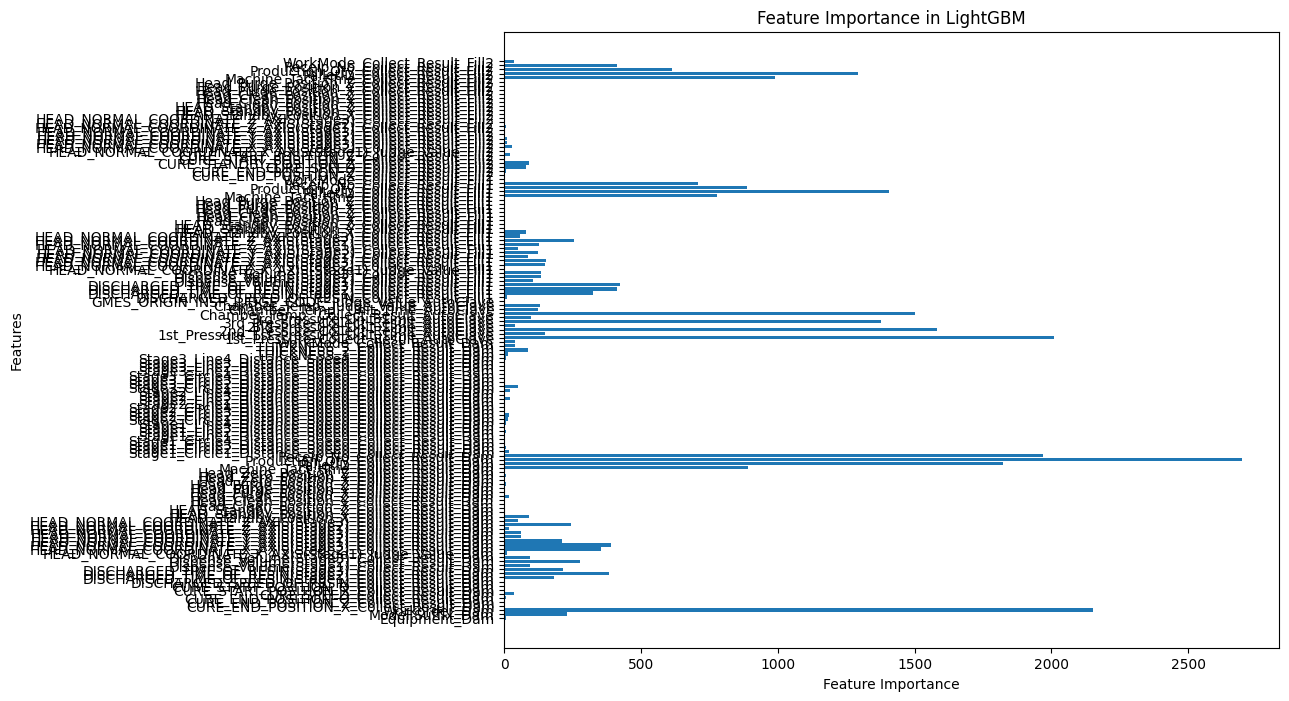

In [196]:
# 피처 중요도 추출
import matplotlib.pyplot as plt
import lightgbm as lgb

# 피처 중요도 확인
importance = gbm.feature_importance()
feature_names = X_train.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in LightGBM")
plt.show()

### 제출하기


테스트 데이터 불러오기

In [197]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
df_test_x = test_data

In [198]:
columns_to_keep = ['Equipment_Dam',
 'Model.Suffix_Dam',
 'Workorder_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE START POSITION X Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
 'HEAD Standby Position X Collect Result_Dam',
 'HEAD Standby Position Y Collect Result_Dam',
 'HEAD Standby Position Z Collect Result_Dam',
 'Head Clean Position X Collect Result_Dam',
 'Head Clean Position Y Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Purge Position X Collect Result_Dam',
 'Head Purge Position Y Collect Result_Dam',
 'Head Purge Position Z Collect Result_Dam',
 'Head Zero Position X Collect Result_Dam',
 'Head Zero Position Y Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
 'Machine Tact time Collect Result_Dam',
 'PalletID Collect Result_Dam',
 'Production Qty Collect Result_Dam',
 'Receip No Collect Result_Dam',
 'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage1 Circle2 Distance Speed Collect Result_Dam',
 'Stage1 Circle3 Distance Speed Collect Result_Dam',
 'Stage1 Circle4 Distance Speed Collect Result_Dam',
 'Stage1 Line1 Distance Speed Collect Result_Dam',
 'Stage1 Line2 Distance Speed Collect Result_Dam',
 'Stage1 Line3 Distance Speed Collect Result_Dam',
 'Stage1 Line4 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle2 Distance Speed Collect Result_Dam',
 'Stage2 Circle3 Distance Speed Collect Result_Dam',
 'Stage2 Circle4 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage2 Line2 Distance Speed Collect Result_Dam',
 'Stage2 Line3 Distance Speed Collect Result_Dam',
 'Stage2 Line4 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Circle2 Distance Speed Collect Result_Dam',
 'Stage3 Circle3 Distance Speed Collect Result_Dam',
 'Stage3 Circle4 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Line2 Distance Speed Collect Result_Dam',
 'Stage3 Line3 Distance Speed Collect Result_Dam',
 'Stage3 Line4 Distance Speed Collect Result_Dam',
 'THICKNESS 1 Collect Result_Dam',
 'THICKNESS 2 Collect Result_Dam',
 'THICKNESS 3 Collect Result_Dam',
 'WorkMode Collect Result_Dam',
 '1st Pressure Collect Result_AutoClave',
 '1st Pressure 1st Pressure Unit Time_AutoClave',
 '2nd Pressure Collect Result_AutoClave',
 '2nd Pressure Unit Time_AutoClave',
 '3rd Pressure Collect Result_AutoClave',
 '3rd Pressure Unit Time_AutoClave',
 'Chamber Temp. Collect Result_AutoClave',
 'Chamber Temp. Unit Time_AutoClave',
 'Chamber Temp. Judge Value_AutoClave',
 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
 'Dispense Volume(Stage1) Collect Result_Fill1',
 'Dispense Volume(Stage2) Collect Result_Fill1',
 'Dispense Volume(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',
 'HEAD Standby Position X Collect Result_Fill1',
 'HEAD Standby Position Y Collect Result_Fill1',
 'HEAD Standby Position Z Collect Result_Fill1',
 'Head Clean Position X Collect Result_Fill1',
 'Head Clean Position Y Collect Result_Fill1',
 'Head Clean Position Z Collect Result_Fill1',
 'Head Purge Position X Collect Result_Fill1',
 'Head Purge Position Y Collect Result_Fill1',
 'Head Purge Position Z Collect Result_Fill1',
 'Machine Tact time Collect Result_Fill1',
 'PalletID Collect Result_Fill1',
 'Production Qty Collect Result_Fill1',
 'Receip No Collect Result_Fill1',
 'WorkMode Collect Result_Fill1',
 'CURE END POSITION X Collect Result_Fill2',
 'CURE END POSITION Z Collect Result_Fill2',
 'CURE SPEED Collect Result_Fill2',
 'CURE STANDBY POSITION Z Collect Result_Fill2',
 'CURE START POSITION X Collect Result_Fill2',
 'CURE START POSITION Z Collect Result_Fill2',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
 'HEAD Standby Position X Collect Result_Fill2',
 'HEAD Standby Position Y Collect Result_Fill2',
 'HEAD Standby Position Z Collect Result_Fill2',
 'Head Clean Position X Collect Result_Fill2',
 'Head Clean Position Y Collect Result_Fill2',
 'Head Clean Position Z Collect Result_Fill2',
 'Head Purge Position X Collect Result_Fill2',
 'Head Purge Position Y Collect Result_Fill2',
 'Head Purge Position Z Collect Result_Fill2',
 'Machine Tact time Collect Result_Fill2',
 'PalletID Collect Result_Fill2',
 'Production Qty Collect Result_Fill2',
 'Receip No Collect Result_Fill2',
 'WorkMode Collect Result_Fill2']

# 해당 컬럼들만 남기고 나머지 컬럼 제거
df_test_x = df_test_x[columns_to_keep]

print(f"df_test_x의 컬럼 개수: {df_test_x.shape[1]}")

df_test_x의 컬럼 개수: 138


테스트 데이터 전처리

In [199]:
columns_to_transform = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
                        'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
                        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
                        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2']

# 변환: null 값이 있는 열은 0, 'OK' 값이 있는 열은 1로
df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)

# 결과 확인 (선택 사항)
df_test_x

/tmp/ipykernel_55/109792692.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)
/tmp/ipykernel_55/109792692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)


,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AX

In [200]:
columns_to_transform = ['Chamber Temp. Judge Value_AutoClave']
 
# 변환: NG 값은 0, 'OK' 값은 1로
df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)

# 결과 확인 (선택 사항)
df_test_x['Chamber Temp. Judge Value_AutoClave']

/tmp/ipykernel_55/1812042493.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)
/tmp/ipykernel_55/1812042493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x[columns_to_transform] = df_test_x[columns_to_transform].applymap(lambda x: 1 if x == 'OK' else 0)


0        1
1        1
2        1
3        1
4        1
        ..
17356    1
17357    1
17358    1
17359    1
17360    1
Name: Chamber Temp. Judge Value_AutoClave, Length: 17361, dtype: int64

In [201]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 컬럼들의 이름 리스트
columns_to_encode = ['Model.Suffix_Dam', 'Workorder_Dam']  # 예시 컬럼들

# 각 컬럼에 대해 레이블 인코딩 수행
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df_test_x[col] = label_encoder.fit_transform(df_test_x[col])

# 결과 출력
print(df_test_x[columns_to_encode].head())

   Model.Suffix_Dam  Workorder_Dam
0                 0            240
1                 0            509
2                 0            128
3                 0            306
4                 0            415


/tmp/ipykernel_55/2204873992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x[col] = label_encoder.fit_transform(df_test_x[col])
/tmp/ipykernel_55/2204873992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x[col] = label_encoder.fit_transform(df_test_x[col])


In [202]:
# Equipment_Dam 컬럼의 앞뒤 공백 제거
df_test_x['Equipment_Dam'] = df_test_x['Equipment_Dam'].str.strip()

# Equipment_Dam 컬럼의 값을 숫자로 변환
df_test_x['Equipment_Dam'] = df_test_x['Equipment_Dam'].map({
    'Dam dispenser #1': 1,
    'Dam dispenser #2': 2
})

# 결과 확인
print(df_test_x['Equipment_Dam'].head())

0    2
1    2
2    1
3    2
4    1
Name: Equipment_Dam, dtype: int64


/tmp/ipykernel_55/4015492212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['Equipment_Dam'] = df_test_x['Equipment_Dam'].str.strip()
/tmp/ipykernel_55/4015492212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['Equipment_Dam'] = df_test_x['Equipment_Dam'].map({


In [157]:
'''
# 전부 정수형으로 변환
df_test_x = test_data

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

SyntaxError: incomplete input (4179700531.py, line 1)

In [207]:
test_pred = gbm.predict(df_test_x)
test_pred

array([0.18946903, 0.82535816, 0.17086432, ..., 0.31189707, 0.02580468,
       0.75169506])

### 제출 파일 작성


In [219]:
# 제출 데이터 읽어오기 (df_test_x는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")

# 확률값을 0과 1로 변환
df_sub["target"] = ['Normal'if pred > 0.5 else 'AbNormal' for pred in test_pred]

print(df_sub)

                                 Set ID    target
0      0001be084fbc4aaa9d921f39e595961b  AbNormal
1      0005bbd180064abd99e63f9ed3e1ac80    Normal
2      000948934c4140d883d670adcb609584  AbNormal
3      000a6bfd02874c6296dc7b2e9c5678a7    Normal
4      0018e78ce91343678716e2ea27a51c95    Normal
...                                 ...       ...
17356  ffea508b59934d689b540f95eb3fa730    Normal
17357  ffed8923c8a448a98afc641b770be153    Normal
17358  fff1e73734da40adbe805359b3efb462  AbNormal
17359  fff8e38bdd09470baf95f71e92075dec  AbNormal
17360  fffa83e0a13d4c2db4fd8bf905b517d4    Normal

[17361 rows x 2 columns]


In [220]:
# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**